In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import Cutout2D

In [2]:
source = Simbad.query_object('[SK2009]_X2')
sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))

In [3]:
hdul = fits.open('../external/JWST/NGC1365/MAST_2022-09-09T0833/JWST/jw02107-c1003_t003_miri_f1000w/jw02107-c1003_t003_miri_f1000w_i2d.fits')

Set DATE-AVG to '2022-08-13T15:57:41.934' from MJD-AVG.
Set DATE-END to '2022-08-13T18:34:04.654' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.417270 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645278014.136 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


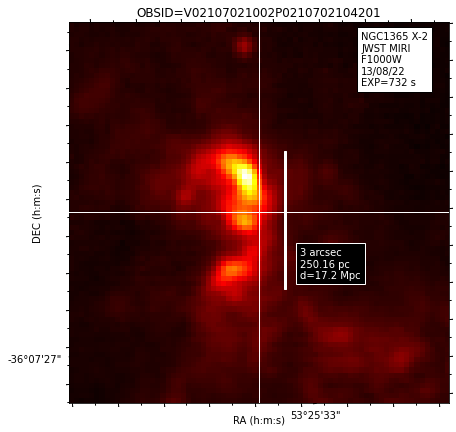

In [52]:
wcs = WCS(hdul[1].header)
xpos, ypos = skycoord_to_pixel(sc, wcs)
pos = (xpos, ypos)
cutout = Cutout2D(hdul[1].data, pos, 75, wcs=wcs) # 50 pixel square
xpos_cut, ypos_cut = skycoord_to_pixel(sc, cutout.wcs)

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=cutout.wcs)
ax.imshow(cutout.data, cmap='hot', origin='lower', interpolation='none')
ax.axhline(xpos_cut, color='white', lw=1.0)
ax.axvline(ypos_cut, color='white', lw=1.0)
ax.text(xpos_cut+20,ypos_cut+25, s='NGC1365 X-2\nJWST MIRI\nF1000W\n13/08/22\nEXP=732 s', bbox={'facecolor':'white'})



# Plot Scalebar
source_distance = 17.2
scalebar_size_arcsec = 3 # size in arcsec
cdelt = cutout.wcs.wcs.cdelt[1]   # CDELT is a fits keyword that gives the size of 1 pixel in degrees
                                  # 3 arcseconds therefore corresponds to 3arcsec = cdelt * 3600
scalebar_size_pixels  = scalebar_size_arcsec / (cdelt*3600)
scalebar_size_parsecs = scalebar_size_arcsec*4.84814e-6 * source_distance*1e6

x_off, y_off = 5,-15
ax.text(xpos_cut[0]+x_off+3, ypos_cut[0]+y_off+2, f'{scalebar_size_arcsec} arcsec\n{scalebar_size_parsecs:.2f} pc\nd={source_distance} Mpc', color='white', bbox={'facecolor':'black','edgecolor':'white'})
ar = ax.arrow(xpos_cut[0]+x_off, ypos_cut[0]+y_off, 0.0, scalebar_size_pixels, head_width=0, head_length=0, fc='white', ec='white', width=0.50)


# Tick Settings
ra = ax.coords['RA']
dec = ax.coords['DEC']
ra.set_ticks(number=10)
dec.set_ticks(number=10)
ra.set_major_formatter('dd:mm:ss')
dec.set_major_formatter('dd:mm:ss')
dec.display_minor_ticks(True)
ra.display_minor_ticks(True)
ra.set_minor_frequency(2)
dec.set_minor_frequency(2)

ra.set_axislabel('RA (h:m:s)', minpad=0)
dec.set_axislabel('DEC (h:m:s)', minpad=-3)
ax.set_title(f'OBSID=V02107021002P0210702104201')
fig.add_axes(ax)
plt.savefig('../figures/NGC1365_X-2_JWST_MIRI.png', bbox_inches='tight')
plt.savefig('../figures/NGC1365_X-2_JWST_MIRI.pdf', bbox_inches='tight')

In [47]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-09-06T19:22:45.324' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02107-c1003_t003_miri_f1000w_i2d.fits' / Name of the file          
SDP_VER = '2022_3  '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-057'      / S&OC PRD version number used in data processing
OSS_VER = '8.4.12  '           / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.6.2   '        

In [20]:
cutout.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 53.37986601547449  -36.18786936711962  
CRPIX : 1975.6070156237279  1348.991702719599  
PC1_1 PC1_2  : 0.07262439145497869  -0.9973593623994282  
PC2_1 PC2_2  : -0.9973593623994282  -0.07262439145497869  
CDELT : 3.08118022442351e-05  3.08118022442351e-05  
NAXIS : 75  75

In [235]:
sc.ra.deg[0]

53.42437499999999

In [146]:
ax.get_yticklabels()

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

In [147]:
ax.get_xticks()

array([-20.,   0.,  20.,  40.,  60.,  80.])

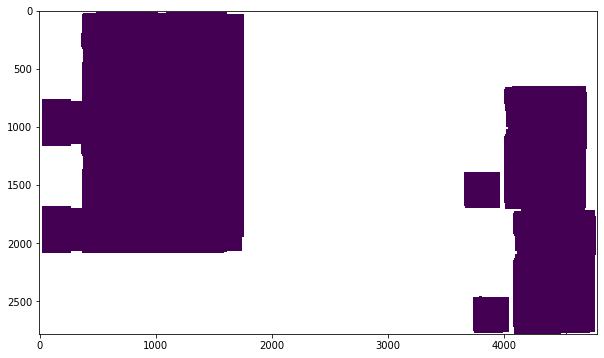

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(hdul[2].data)

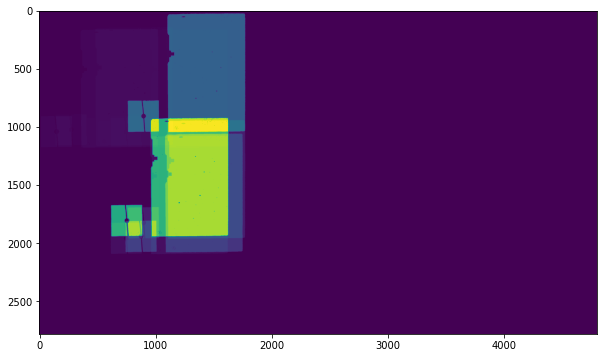

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(hdul[3].data)

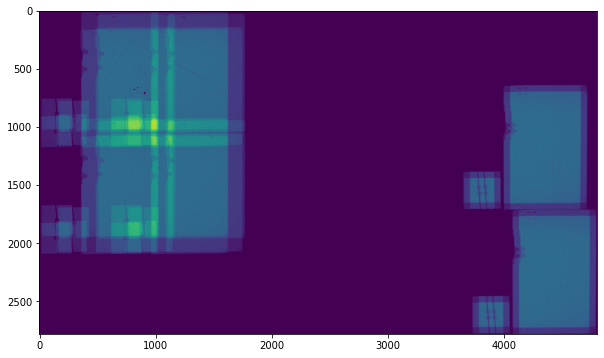

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(hdul[4].data)

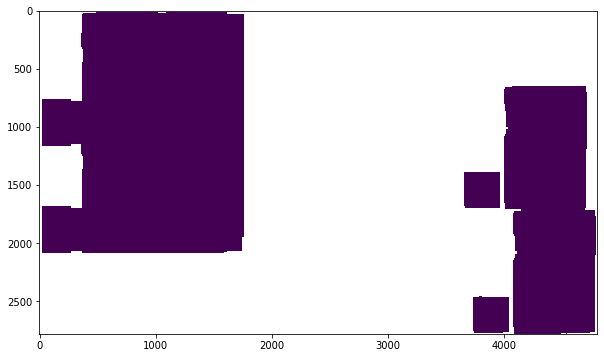

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(hdul[5].data)

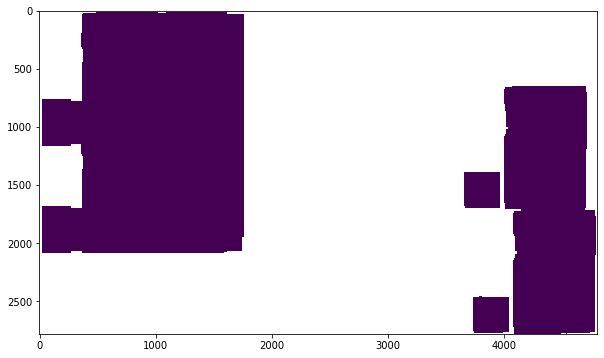

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(hdul[6].data)

In [12]:
hdul[1].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4804                                                  
NAXIS2  =                 2779                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59804.56363706667 / [d] exposure start time in MJD                 
MJD-AVG =    59804.66506867704 / [d] exposure mid-point in MJD                  
MJD-END =    59804.77366497685 / [d] exposure end time in MJD                   
TDB-BEG =    59804.56314181514 / [d] TDB time of exposure start in MJD          
TDB-MID =    59804.664578054